In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor


In [113]:
out_dir = os.path.join(os.getcwd(), "../../out/pca")

In [114]:
def plot_data(data, x, y, z, ax=None):
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_zlabel(z)

    ax.scatter(data[x], data[y], data[z])

In [115]:
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('data/fish.csv')[['Width', 'Height', 'Length1', 'Weight']].rename(columns={
    'Width': 'width (cm)',
    'Length1': 'length (cm)',
    'Height': 'height (cm)',
    'Weight': 'weight (g)'
})

df_std = pd.DataFrame(StandardScaler().fit_transform(df), index=df.index, columns=df.columns)

## Feature selection - Intuition

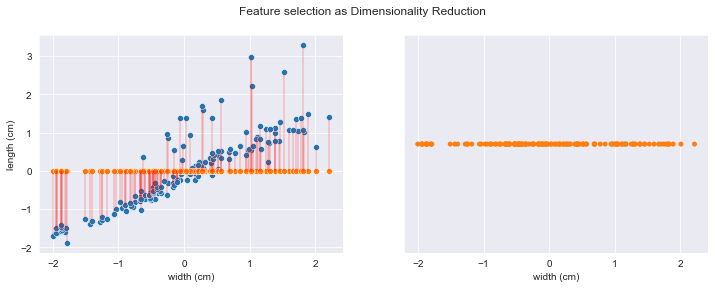

In [116]:
def plot_error_x_y(x1, x2, y1, y2, ax):
    ax.plot([x1, x2], [y1, y2], c='red', alpha=0.2)

def plot_error_x(x1, x2, y1, ax):
    ax.plot([x1, x2], [y1, y1], c='red', alpha=0.2)

def plot_error_y(x, y1, y2, ax):
    ax.plot([x, x], [y1, y2], c='red', alpha=0.2)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle("Feature selection as Dimensionality Reduction")
sns.scatterplot(data=df_std, x='width (cm)', y='length (cm)', ax=axes[0])
sns.scatterplot(data=df_std, x='width (cm)', y=0, ax=axes[0])
# sns.scatterplot(data=df_std, x=0, y='length (cm)', ax=axes[0])

for _, row in df_std.iterrows():
    plot_error_y(row['width (cm)'], row['length (cm)'], 0, axes[0])

sns.stripplot(data=df_std, x='width (cm)', ax=axes[1], jitter=0, color=sns.color_palette()[1])
# sns.stripplot(data=df_std, x='length (cm)', ax=axes[2], jitter=0, color=sns.color_palette()[2])
plt.show()

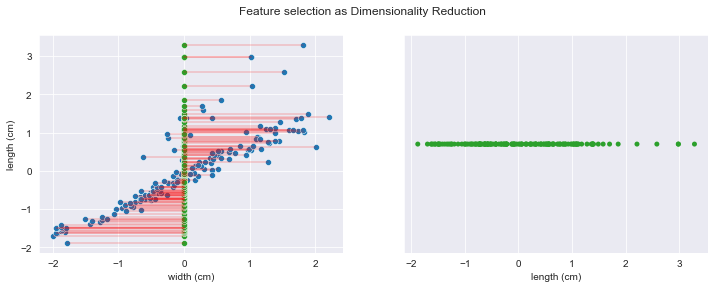

In [117]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle("Feature selection as Dimensionality Reduction")
sns.scatterplot(data=df_std, x='width (cm)', y='length (cm)', ax=axes[0])
sns.scatterplot(data=df_std, x=0, y='length (cm)', ax=axes[0], color=sns.color_palette()[2])

for _, row in df_std.iterrows():
    plot_error_x(row['width (cm)'], 0, row['length (cm)'], axes[0])

sns.stripplot(data=df_std, x='length (cm)', ax=axes[1], jitter=0, color=sns.color_palette()[2])
plt.show()


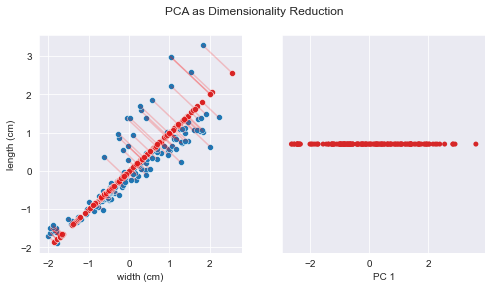

In [118]:
from sklearn.decomposition import PCA

fig, axes = plt.subplots(1, 2, figsize=(8, 4))

pca_1 = PCA(n_components=1).fit(df_std[['width (cm)', 'length (cm)']])

pca_1_proj = pca_1.transform(df_std[['width (cm)', 'length (cm)']])
pca_1_re = pca_1.inverse_transform(pca_1_proj)

fig.suptitle("PCA as Dimensionality Reduction")
sns.scatterplot(data=df_std, x='width (cm)', y='length (cm)', ax=axes[0])
sns.scatterplot(x=pca_1_re[:, 0], y=pca_1_re[:, 1], color=sns.color_palette()[3], ax=axes[0])

for (_, row), x2, y2 in zip(df_std.iterrows(), pca_1_re[:, 0], pca_1_re[:, 1]):
    plot_error_x_y(row['width (cm)'], x2, row['length (cm)'], y2, axes[0])

gfg = sns.stripplot(x=pca_1_proj, jitter=0, color=sns.color_palette()[3], ax=axes[1])
gfg.set_xlabel("PC 1")
plt.show()

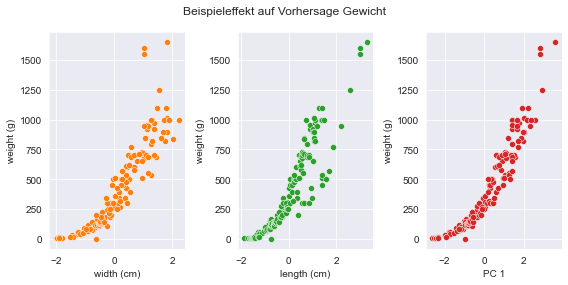

In [119]:
fig, axes = plt.subplots(1, 3, figsize=(8, 4))
fig.suptitle("Beispieleffekt auf Vorhersage Gewicht")
sns.scatterplot(data=df_std, x='width (cm)', y=df['weight (g)'], ax=axes[0], color=sns.color_palette()[1])
sns.scatterplot(data=df_std, x='length (cm)', y=df['weight (g)'], ax=axes[1], color=sns.color_palette()[2])
gfg = sns.scatterplot(x=pca_1_proj[:, 0], y=df['weight (g)'], ax=axes[2], color=sns.color_palette()[3])
gfg.set_xlabel("PC 1")
plt.tight_layout()
plt.show()

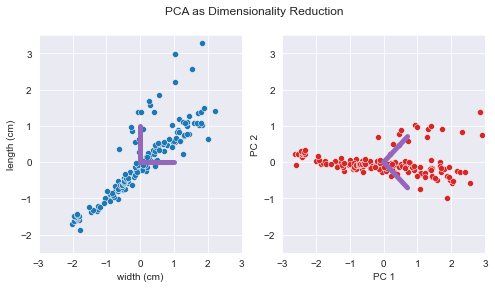

In [120]:
from sklearn.decomposition import PCA

fig, axes = plt.subplots(1, 2, figsize=(8, 4))

for ax in axes.flatten():
    ax.set_xlim([-3, 3])
    ax.set_ylim([-2.5, 3.5])

pca_2 = PCA(n_components=2).fit(df_std[['width (cm)', 'length (cm)']])

pca_2_proj = pca_2.transform(df_std[['width (cm)', 'length (cm)']])

fig.suptitle("PCA as Dimensionality Reduction")
sns.scatterplot(data=df_std, x='width (cm)', y='length (cm)', ax=axes[0])
pc_color = sns.color_palette()[4]
# plot components
axes[1].plot(
    [0, pca_2.components_[0, 0]],
    [0, pca_2.components_[1, 0]],
    color=pc_color,
    linewidth=5
)
axes[1].plot(
    [0, pca_2.components_[0, 1]],
    [0, pca_2.components_[1, 1]],
    color=pc_color,
    linewidth=5
)

gfg = sns.scatterplot(x=pca_2_proj[:, 0], y=pca_2_proj[:, 1], color=sns.color_palette()[3], ax=axes[1])
axes[0].plot([0, 1], [0, 0], color=pc_color, linewidth=5)
axes[0].plot([0, 0], [0, 1], color=pc_color, linewidth=5)
gfg.set_xlabel("PC 1")
gfg.set_ylabel("PC 2")
plt.show()

In [121]:
from sklearn.decomposition import PCA
import imageio

pca_2 = PCA(n_components=2).fit(df_std[['width (cm)', 'length (cm)']])

filenames = []

# pca_2_proj = pca_2.transform(df_std[['width (cm)', 'length (cm)']])
U = pca_2.components_
I = np.eye(2)

for i in range(10, -1, -1):

    fig, axes = plt.subplots(1, 2, figsize=(8, 4))

    for ax in axes.flatten():
        ax.set_xlim([-3, 3])
        ax.set_ylim([-2.5, 3.5])

    w = i / 10
    U_p = w * I + (1 - w) * U
    pca_2_proj = U_p.dot(df_std[['width (cm)', 'length (cm)']].values.transpose()).transpose()
    pca_2_basis = U_p.dot(pca_2.components_.transpose())

    fig.suptitle("PCA as Dimensionality Reduction")
    sns.scatterplot(data=df_std, x='width (cm)', y='length (cm)', ax=axes[0])
    # plot components
    axes[0].plot(
        [-pca_2.components_[0, 0]*10, pca_2.components_[0, 0]*10],
        [-pca_2.components_[0, 1]*10, pca_2.components_[0, 1]*10],
        color=pc_color,
        linewidth=5
    )
    axes[0].plot(
        [-pca_2.components_[1, 0]*10, pca_2.components_[1, 0]*10],
        [-pca_2.components_[1, 1]*10, pca_2.components_[1, 1]*10],
        color=pc_color,
        linewidth=5
    )

    gfg = sns.scatterplot(x=pca_2_proj[:, 0], y=pca_2_proj[:, 1], color=sns.color_palette()[3], ax=axes[1])
    axes[1].plot([-pca_2_basis[0, 0]*10, pca_2_basis[0, 0]*10], [-pca_2_basis[1, 0]*10, pca_2_basis[1, 0]*10], color=pc_color, linewidth=5)
    axes[1].plot([-pca_2_basis[0, 1]*10, pca_2_basis[0, 1]*10], [-pca_2_basis[1, 1]*10, pca_2_basis[1, 1]*10], color=pc_color, linewidth=5)
    if i == 0:
        gfg.set_xlabel("PC 1")
        gfg.set_ylabel("PC 2")
    filename = os.path.join(out_dir, f"temp_{i}.png")
    filenames.append(filename)
    plt.savefig(filename)
    plt.close()

filenames.append(filenames[-1]) # copy last frame

# build gif
print("Build GIF...")
images = []
for filename in filenames:
    images.append(imageio.imread(filename))
images.append(imageio.imread(filenames[-1])) # Add last frame twice
imageio.mimsave(os.path.join(out_dir, 'pca_2d.gif'), images, duration = 0.5)

# Remove files
print("Delete generated frames...")
for filename in set(filenames):
    os.remove(filename)

print("All done")
plt.close()

Build GIF...


/var/folders/7d/vvm6spgd0k97dhyt65d21k600000gn/T/ipykernel_8055/3511815355.py:58: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))
/var/folders/7d/vvm6spgd0k97dhyt65d21k600000gn/T/ipykernel_8055/3511815355.py:59: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filenames[-1])) # Add last frame twice


Delete generated frames...
All done


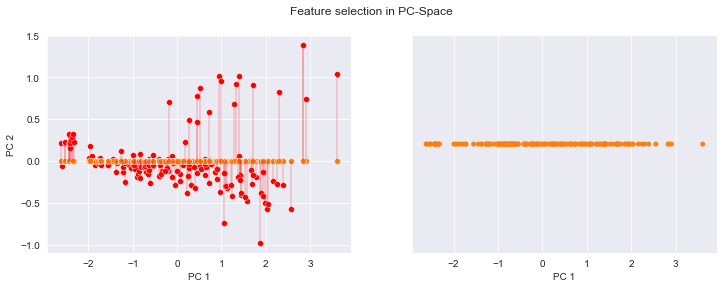

In [122]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle("Feature selection in PC-Space")
sns.scatterplot(x=pca_2_proj[:, 0], y=pca_2_proj[:, 1], ax=axes[0], color='red')
gfg = sns.scatterplot(x=pca_2_proj[:, 0], y=0, ax=axes[0], color=sns.color_palette()[1])
gfg.set_xlabel("PC 1")
gfg.set_ylabel("PC 2")
# sns.scatterplot(data=df_std, x=0, y='length (cm)', ax=axes[0])

for x, y in zip(pca_2_proj[:, 0], pca_2_proj[:, 1]):
    plot_error_y(x, y, 0, axes[0])

gfg = sns.stripplot(x=pca_2_proj[:, 0], ax=axes[1], jitter=0, color=sns.color_palette()[1])
gfg.set_xlabel("PC 1")
plt.show()

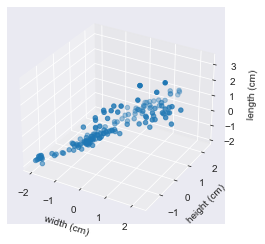

In [123]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

plot_data(data=df_std, x='width (cm)', y='height (cm)', z='length (cm)', ax=ax)
plt.show()

In [124]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_1 = PCA(n_components=1).fit(df_std[['width (cm)', 'height (cm)', 'length (cm)']])
df_std_pca = pca.fit_transform(df_std[['width (cm)', 'height (cm)', 'length (cm)']])

In [125]:
pc_1 = pca.components_[:, 0]
pc_2 = pca.components_[:, 1]
pc_3 = pca.components_[:, 2]

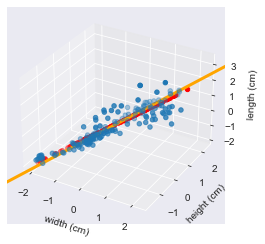

In [126]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

pca_1_data = pca_1.inverse_transform(df_std_pca[:, 0].reshape(-1, 1))

plot_data(data=df_std, x='width (cm)', y='height (cm)', z='length (cm)', ax=ax)
ax.scatter(pca_1_data[:, 0], pca_1_data[:, 1], pca_1_data[:, 2], color='red')
plt.autoscale(False)
scale_f = 10
ax.plot3D([-pc_1[0]*scale_f, pc_1[0]*scale_f], [-pc_1[1]*scale_f, pc_1[1]*scale_f], [-pc_1[2]*scale_f, pc_1[2]*scale_f], color='orange', linewidth=3)

plt.show()

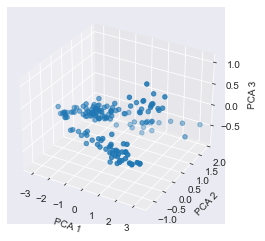

In [127]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")

ax.scatter(df_std_pca[:, 0], df_std_pca[:, 1], df_std_pca[:, 2])
plt.show()

## Limits

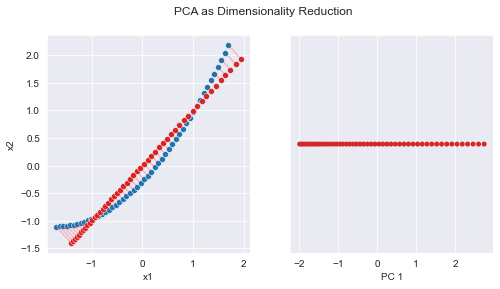

In [131]:
from sklearn.decomposition import PCA

def show_case_non_linear(f):

    x1 = np.arange(50)

    df_ex = pd.DataFrame(StandardScaler().fit_transform(pd.DataFrame({
        "x1": x1,
        "x2": f(x1)
    })), columns=['x1', 'x2'])

    fig, axes = plt.subplots(1, 2, figsize=(8, 4))

    pca_1 = PCA(n_components=1).fit(df_ex[['x1', 'x2']])

    pca_1_proj = pca_1.transform(df_ex[['x1', 'x2']])
    pca_1_re = pca_1.inverse_transform(pca_1_proj)

    fig.suptitle("PCA as Dimensionality Reduction")
    sns.scatterplot(data=df_ex, x='x1', y='x2', ax=axes[0])
    sns.scatterplot(x=pca_1_re[:, 0], y=pca_1_re[:, 1], color=sns.color_palette()[3], ax=axes[0])

    for (_, row), x2, y2 in zip(df_ex.iterrows(), pca_1_re[:, 0], pca_1_re[:, 1]):
        plot_error_x_y(row['x1'], x2, row['x2'], y2, axes[0])

    gfg = sns.stripplot(x=pca_1_proj, jitter=0, color=sns.color_palette()[3], ax=axes[1])
    gfg.set_xlabel("PC 1")

show_case_non_linear(lambda x: np.power(x, 2))
# plt.savefig(os.path.join(out_dir, 'example-data-with-model-2d-possible.png'))
plt.show()

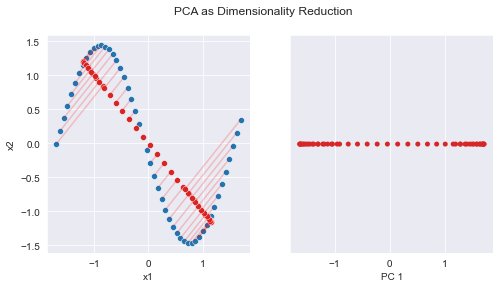

In [132]:
show_case_non_linear(lambda x: np.sin(x / 7.5))
plt.savefig(os.path.join(out_dir, 'example-data-with-model-2d-possible.png'))
plt.show()

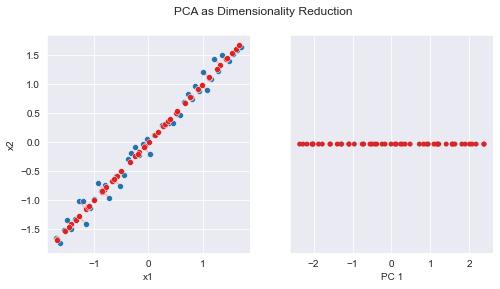

In [133]:
from numpy.random import normal

show_case_non_linear(lambda x: x + 2*normal(size=x.shape[0]))
# plt.savefig(os.path.join(out_dir, 'pca_nolimit.png'))
plt.show()